In [1]:
# Display the DataFrame of appointments regional (ar)
import pandas as pd

ar = pd.read_csv("appointments_regional.csv")

print(ar.head())

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


In [3]:
# The minimum and maximum dates pertaining to the ar data set
import pandas as pd

ar = pd.read_csv("appointments_regional.csv")

ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

min_date = ar['appointment_month'].min()
max_date = ar['appointment_month'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2020-01-01 00:00:00
Maximum Date: 2022-06-01 00:00:00


In [4]:
# The data set to only look at the data from 2021-08 onwards
import pandas as pd

ar = pd.read_csv("appointments_regional.csv")

ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

filtered_ar = ar[ar['appointment_month'] >= '2021-08-01']

print(filtered_ar.head())

     icb_ons_code appointment_month appointment_status hcp_type  \
3652    E54000034        2021-08-01           Attended       GP   
3653    E54000034        2021-08-01           Attended       GP   
3654    E54000034        2021-08-01           Attended       GP   
3655    E54000034        2021-08-01           Attended       GP   
3656    E54000034        2021-08-01           Attended       GP   

     appointment_mode time_between_book_and_appointment  count_of_appointments  
3652     Face-to-Face                             1 Day                   6553  
3653     Face-to-Face                    15  to 21 Days                   2390  
3654     Face-to-Face                       2 to 7 Days                  10547  
3655     Face-to-Face                    22  to 28 Days                    937  
3656     Face-to-Face                     8  to 14 Days                   4961  


In [7]:
# Question 1: Should the NHS start looking at increasing staff levels?
#  A new DataFrame to review the different features
import pandas as pd

ar_agg = pd.read_csv("appointments_regional.csv")

print(ar_agg.head())

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


In [9]:
import pandas as pd

ar_agg = pd.read_csv("appointments_regional.csv")

selected_columns = ['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment']
ar_agg_selected = ar_agg[selected_columns]

ar_agg = ar_agg_selected.describe()

print(ar_agg)

       appointment_month              hcp_type appointment_status  \
count             596821                596821             596821   
unique                30                     3                  3   
top              2020-03  Other Practice staff           Attended   
freq               21350                241557             232137   

       appointment_mode time_between_book_and_appointment  
count            596821                            596821  
unique                5                                 8  
top        Face-to-Face                          Same Day  
freq             180410                             95502  


In [13]:
# The sum of count_of_appointments
import pandas as pd

ar_agg = pd.read_csv("appointments_regional.csv")

ar_agg_grouped = ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

print(ar_agg_grouped)


   appointment_month  count_of_appointments
0            2020-01               27199296
1            2020-02               24104621
2            2020-03               24053468
3            2020-04               16007881
4            2020-05               16417212
5            2020-06               20690805
6            2020-07               22491437
7            2020-08               20150520
8            2020-09               26714255
9            2020-10               28301932
10           2020-11               25061602
11           2020-12               23535936
12           2021-01               22492069
13           2021-02               22399569
14           2021-03               27225424
15           2021-04               23879932
16           2021-05               23508395
17           2021-06               26784182
18           2021-07               25739219
19           2021-08               23852171
20           2021-09               28522501
21           2021-10            

In [14]:
import pandas as pd

# Create an empty DataFrame
ar_df = pd.DataFrame()

# Display the empty DataFrame
print(ar_df)


Empty DataFrame
Columns: []
Index: []


In [15]:
# The total number of appointments per month
import pandas as pd

ar_df = pd.read_csv("appointments_regional.csv")

ar_df_grouped = ar_df.groupby('appointment_month').size().reset_index(name='count_of_appointments')

print(ar_df_grouped)

   appointment_month  count_of_appointments
0            2020-01                  20889
1            2020-02                  20689
2            2020-03                  21350
3            2020-04                  19124
4            2020-05                  18338
5            2020-06                  18844
6            2020-07                  19502
7            2020-08                  19247
8            2020-09                  20043
9            2020-10                  20122
10           2020-11                  19675
11           2020-12                  19394
12           2021-01                  19319
13           2021-02                  18949
14           2021-03                  19369
15           2021-04                  19452
16           2021-05                  19384
17           2021-06                  19814
18           2021-07                  19899
19           2021-08                  19786
20           2021-09                  20441
21           2021-10            

In [16]:
# The average utilization by dividing sum_of_appointments by 30
ar_df_grouped['utilisation'] = ar_df_grouped['count_of_appointments'] / 30

print(ar_df_grouped)

   appointment_month  count_of_appointments  utilisation
0            2020-01                  20889   696.300000
1            2020-02                  20689   689.633333
2            2020-03                  21350   711.666667
3            2020-04                  19124   637.466667
4            2020-05                  18338   611.266667
5            2020-06                  18844   628.133333
6            2020-07                  19502   650.066667
7            2020-08                  19247   641.566667
8            2020-09                  20043   668.100000
9            2020-10                  20122   670.733333
10           2020-11                  19675   655.833333
11           2020-12                  19394   646.466667
12           2021-01                  19319   643.966667
13           2021-02                  18949   631.633333
14           2021-03                  19369   645.633333
15           2021-04                  19452   648.400000
16           2021-05           

In [18]:
# The NHS can accommodate a maximum of 1,200,000 appointments per day
max_capacity = 1200000

ar_df_grouped['utilization_percentage'] = (ar_df_grouped['count_of_appointments'] / 30) / max_capacity * 100

print(ar_df_grouped)

   appointment_month  count_of_appointments  utilisation  \
0            2020-01                  20889   696.300000   
1            2020-02                  20689   689.633333   
2            2020-03                  21350   711.666667   
3            2020-04                  19124   637.466667   
4            2020-05                  18338   611.266667   
5            2020-06                  18844   628.133333   
6            2020-07                  19502   650.066667   
7            2020-08                  19247   641.566667   
8            2020-09                  20043   668.100000   
9            2020-10                  20122   670.733333   
10           2020-11                  19675   655.833333   
11           2020-12                  19394   646.466667   
12           2021-01                  19319   643.966667   
13           2021-02                  18949   631.633333   
14           2021-03                  19369   645.633333   
15           2021-04                  19

In [24]:
# Round the value to one decimal place
max_capacity = 1200000

ar_df_grouped['utilization_percentage'] = round((ar_df_grouped['count_of_appointments'] / 30) / max_capacity * 100, 1)

print(ar_df_grouped)

   appointment_month  count_of_appointments  utilisation  \
0            2020-01                  20889   696.300000   
1            2020-02                  20689   689.633333   
2            2020-03                  21350   711.666667   
3            2020-04                  19124   637.466667   
4            2020-05                  18338   611.266667   
5            2020-06                  18844   628.133333   
6            2020-07                  19502   650.066667   
7            2020-08                  19247   641.566667   
8            2020-09                  20043   668.100000   
9            2020-10                  20122   670.733333   
10           2020-11                  19675   655.833333   
11           2020-12                  19394   646.466667   
12           2021-01                  19319   643.966667   
13           2021-02                  18949   631.633333   
14           2021-03                  19369   645.633333   
15           2021-04                  19

In [25]:
# The data type of appointment_month to string in ar_agg DataFrame
ar_agg['appointment_month'] = ar_agg_grouped['appointment_month'].astype(str)

# The data type of appointment_month to string in ar_df DataFrame
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)


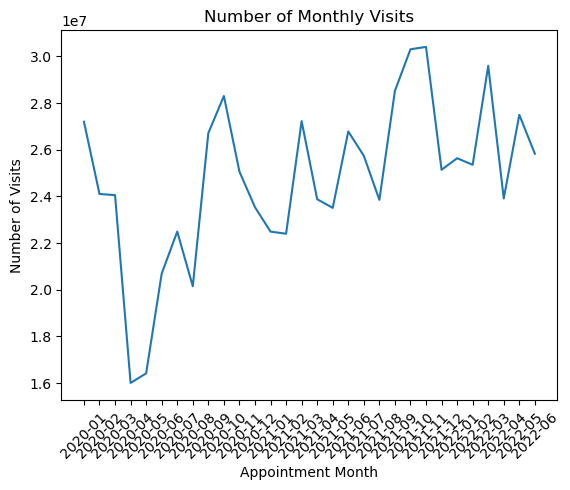

In [31]:
# A lineplot indicating the number of monthly visits
import matplotlib.pyplot as plt

plt.plot(ar_agg_grouped['appointment_month'], ar_agg_grouped['count_of_appointments'])

plt.xlabel('Appointment Month')

plt.ylabel('Number of Visits')

plt.title('Number of Monthly Visits')

plt.xticks(rotation=45)

plt.show()

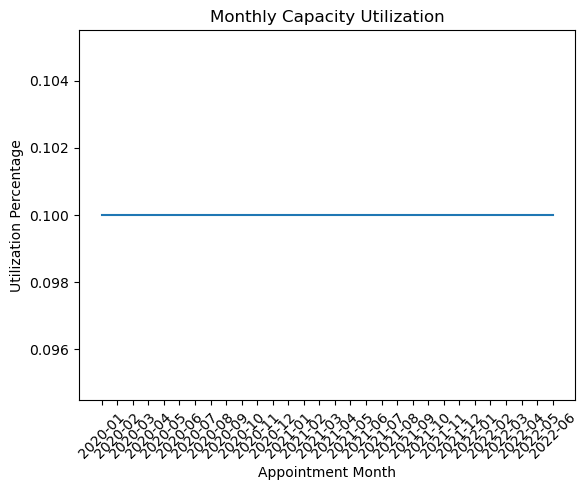

In [37]:
# A lineplot indicating the monthly capacity utilisation
import matplotlib.pyplot as plt

plt.plot(ar_df_grouped['appointment_month'], ar_df_grouped['utilization_percentage'])

plt.xlabel('Appointment Month')

plt.ylabel('Utilization Percentage')

plt.title('Monthly Capacity Utilization')

plt.xticks(rotation=45)

plt.show()

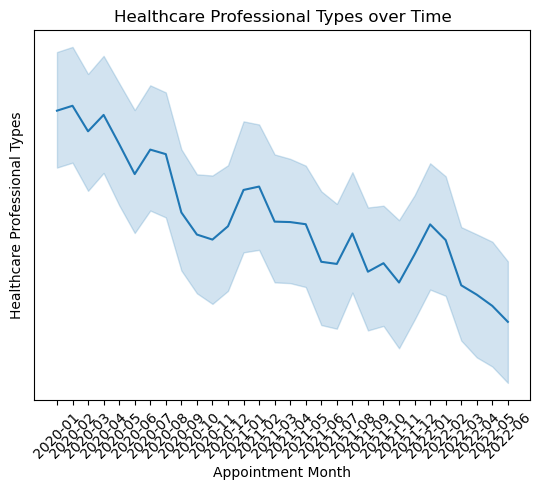

In [39]:
# Question 2: How do the healthcare professional types differ over time?
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=ar, x='appointment_month', y='hcp_type')

plt.xlabel('Appointment Month')

plt.ylabel('Healthcare Professional Types')

plt.title('Healthcare Professional Types over Time')

plt.xticks(rotation=45)

plt.show()

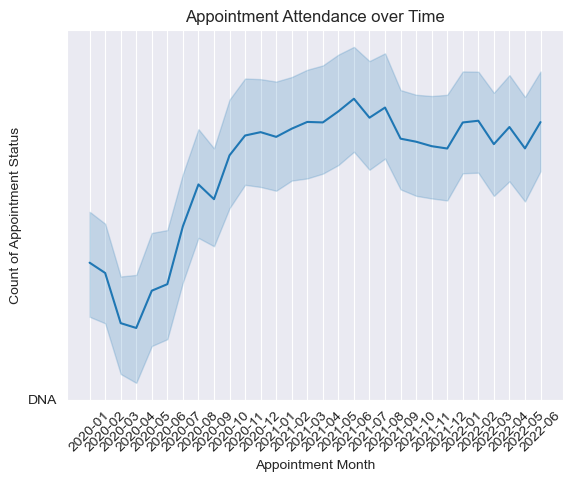

In [43]:
# Question 3: Are there significant changes in whether or not visits are attended?
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

sns.lineplot(data=ar, x='appointment_month', y='appointment_status')

plt.xlabel('Appointment Month')

plt.ylabel('Count of Appointment Status')

plt.title('Appointment Attendance over Time')

plt.xticks(rotation=45)

plt.show()


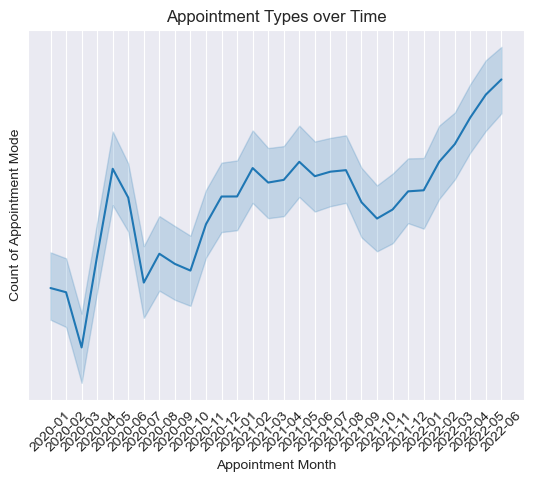

In [42]:
# Question 4: Are there changes in terms of appointment type and the busiest months?
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

sns.lineplot(data=ar, x='appointment_month', y='appointment_mode')

plt.xlabel('Appointment Month')

plt.ylabel('Count of Appointment Mode')

plt.title('Appointment Types over Time')

plt.xticks(rotation=45)

plt.show()

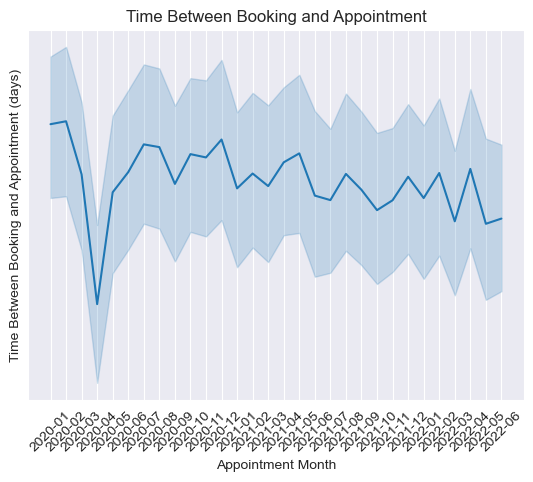

In [44]:
# Question 5: Are there any trends in time between booking an appointment?
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

sns.lineplot(data=ar, x='appointment_month', y='time_between_book_and_appointment')

plt.xlabel('Appointment Month')

plt.ylabel('Time Between Booking and Appointment (days)')

plt.title('Time Between Booking and Appointment')

plt.xticks(rotation=45)

plt.show()

In [46]:
# Question 6: How do the various service settings compare?
# The national_category.xlsx DataFrame 
import pandas as pd

nc = pd.read_excel('national_categories.xlsx')

print(nc.head())

  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2             

In [47]:
# The month of appointment and number of appointments
import pandas as pd

appointment_count_nc = nc.groupby('appointment_month').size().reset_index(name='count_of_appointments')

print(appointment_count_nc)

   appointment_month  count_of_appointments
0            2021-08                  69999
1            2021-09                  74922
2            2021-10                  74078
3            2021-11                  77652
4            2021-12                  72651
5            2022-01                  71896
6            2022-02                  71769
7            2022-03                  82822
8            2022-04                  70012
9            2022-05                  77425
10           2022-06                  74168


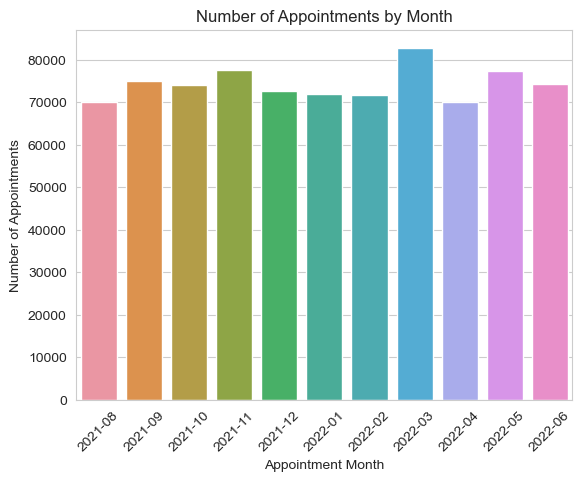

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

sns.barplot(data=appointment_count_nc, x='appointment_month', y='count_of_appointments')

plt.xlabel('Appointment Month')

plt.ylabel('Number of Appointments')

plt.title('Number of Appointments by Month')

plt.xticks(rotation=45)

plt.show()

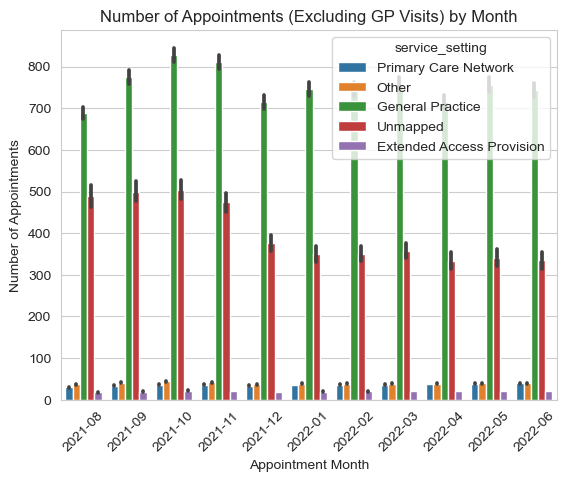

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

nc = pd.read_excel('national_categories.xlsx')

hue = 'service_setting'

sns.set_style('whitegrid')

sns.barplot(data=nc, x='appointment_month', y='count_of_appointments', hue=hue)

plt.xlabel('Appointment Month')

plt.ylabel('Number of Appointments')

plt.title('Number of Appointments (Excluding GP Visits) by Month')

plt.xticks(rotation=45)

plt.show()